In [1]:
# math library
import numpy as np

# plotting library
import matplotlib.pyplot as plt

# scientific library
# helps with pulling .dat files
import scipy.io as sio

In [2]:
# pulling .dat file into notebook
mt = sio.loadmat('Midterm.mat')

T2d = mt['T2D']
T0 = mt['T_o'][0][0]
z2d = mt['Z2D']
k = mt['K'][0][0]
zi = z2d[-1][0]

0.03

In [22]:
def T(tf,zf):
    return 1000*k*(tf-ti)/(zf-zi)

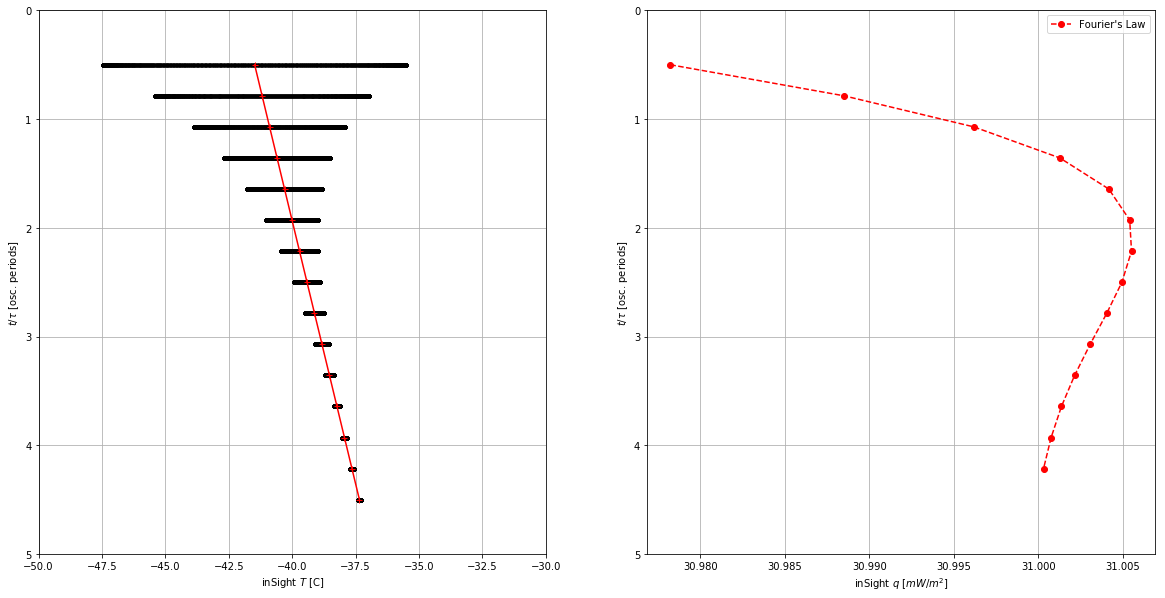

In [23]:
fig,((ax1),(ax2)) = plt.subplots(1,2,figsize=(20,10))
T2dMean = []
z2dLvl = []
for i in range(0,len(T2d)):
    ax1.plot(T2d[i,:],z2d[i,:],'k.',label='Faux Insight Data')
    T2dMean.append(np.mean(T2d[i,:]))
    z2dLvl.append(z2d[i,:1][0])
ax1.plot(T2dMean,z2dLvl,'r+',label='Temporal Means')
ax1.plot(T2dMean,z2dLvl,'r-',label='Temporal Means')

ti = T2dMean[-1]
del T2dMean[-1]
del z2dLvl[-1]
fourier = T(T2dMean,z2dLvl)

ax2.plot(fourier,z2dLvl,'r--o',label='Fourier\'s Law')
ax2.set_ylim(5,0)

ax1.axis([-50,-30,5,0])
ax1.set_ylabel(r'$t/\tau$ [osc. periods]')
ax1.set_xlabel(r'inSight $T$ [C]')
ax1.grid(True)


ax2.set_ylabel(r'$t/\tau$ [osc. periods]')
ax2.set_xlabel(r'inSight $q$ [$mW/m^2$]')
ax2.grid(True)
ax2.legend()
